### Inspect `output_doc_id.csv`

Import libraries

In [1]:
import pandas as pd  # import pandas library
import matplotlib.pyplot as plt  # import pyplot submodule of matplotlib library

Read CSV into pandas DataFrame

In [2]:
df = pd.read_csv('../csv/output_doc_id.csv', dtype={'doc': 'str'})  # retain string format for doc values

Check for missing DataFrame values

In [3]:
df.isnull().sum()  # return True for `None` and `NaN`; sum up null values

doc               0
ed                0
img               0
lrx               0
lry               0
width             0
height            0
type              0
title             0
author            0
author-uri        0
notBefore-iso     0
notAfter-iso      0
place             0
place-uri         0
repository        0
repository-uri    0
collection        0
idno              0
dtype: int64

Display DataFrame information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   doc             84 non-null     object
 1   ed              84 non-null     object
 2   img             84 non-null     int64 
 3   lrx             84 non-null     int64 
 4   lry             84 non-null     int64 
 5   width           84 non-null     int64 
 6   height          84 non-null     int64 
 7   type            84 non-null     object
 8   title           84 non-null     object
 9   author          84 non-null     object
 10  author-uri      84 non-null     object
 11  notBefore-iso   84 non-null     object
 12  notAfter-iso    84 non-null     object
 13  place           84 non-null     object
 14  place-uri       84 non-null     object
 15  repository      84 non-null     object
 16  repository-uri  84 non-null     object
 17  collection      84 non-null     object
 18  idno        

### Clean and visualize data

Clean DataFrame

In [5]:
df_clean = df.drop_duplicates(subset='doc')[['doc', 'author', 'place', 'notBefore-iso']]  # drop subsequent rows with duplicate values in doc column

df_clean.set_index('doc', inplace=True)  # set doc values as index in cleaned dataframe

pd.set_option('display.max_rows', None)  # print clean one-row-per-document dataframe
print(df_clean)


            author         place              notBefore-iso
doc                                                        
0001  Auden, W. H.  Kirchstetten  1960-07-25T00:00:00+01:00
0002  Auden, W. H.  Kirchstetten  1964-09-08T00:00:00+01:00
0003  Auden, W. H.  Kirchstetten  1965-05-24T00:00:00+01:00
0004  Auden, W. H.  Kirchstetten  1964-10-07T00:00:00+01:00
0005  Auden, W. H.  Kirchstetten  1967-05-09T00:00:00+01:00
0006  Auden, W. H.  Kirchstetten  1967-06-05T00:00:00+01:00
0007  Auden, W. H.  Kirchstetten  1965-07-28T00:00:00+01:00
0008  Auden, W. H.        Berlin  1965-04-16T00:00:00+01:00
0009  Auden, W. H.  Kirchstetten  1966-06-29T00:00:00+01:00
0010  Auden, W. H.  Kirchstetten  1969-08-27T00:00:00+01:00
0011  Auden, W. H.  Kirchstetten  1965-06-27T00:00:00+01:00
0012  Auden, W. H.        Berlin  1964-11-08T00:00:00+01:00
0013  Auden, W. H.  Kirchstetten  1969-08-20T00:00:00+01:00
0014  Auden, W. H.        Berlin  1964-12-08T00:00:00+01:00
0015  Auden, W. H.  Kirchstetten  1964-0

Convert date strings to datetime objects

In [6]:
df_clean['notBefore-iso'] = pd.to_datetime(df_clean['notBefore-iso'], errors='coerce')  # convert strings in notBefore-iso column to datetime objects; replace invalid string values with NaT values

df_clean['notBefore-iso'].isnull().sum()  # check for NaT values

np.int64(0)

Resample DataFrame

In [7]:
df_clean.set_index('notBefore-iso', inplace=True)  # set date values as index in cleaned dataframe

monthly_counts = df_clean.resample('ME').size()  # resample into groups by month; count document number per group in pandas series

monthly_counts = monthly_counts.fillna(0)  # replace NULL values in series with value 0

Plot documents per month

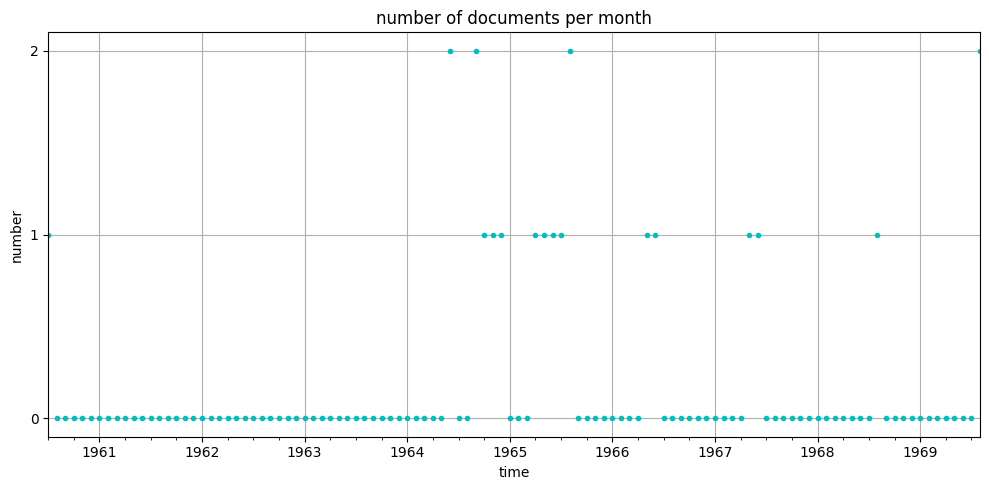

In [8]:
plt.figure(figsize=(10, 5))  # initialize figure with dimensions in inches

monthly_counts.plot(kind='line', marker='.', linestyle='None', color='c')  # plot series in line plot; setting point markers, no lines, cyan color

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # retrieve axes; set major y-axis ticks to show integers

# add labels
plt.title('number of documents per month')
plt.xlabel('time')
plt.ylabel('number')


plt.grid(True)  # display grid lines

plt.tight_layout()  # automatically adjust spacing between figure elements

# Show the plot
plt.show()  # display plot